# Apartado 3

In [5]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

En este ejercicio realizaremos una exploración de datos en el conjunto de datos adjunto `football_goalscorers.csv`. El paquete Pandas nos sirve para trabajar más cómodamente con conjuntos de datos (datasets). Para empezar, leeremos los datos que están en formato CSV para colocarlos en una estructura de datos llamada DataFrames que facilita las operaciones.

El paquete [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) nos sirve para trabajar más cómodamente con conjuntos de datos. Para empezar, leeremos los datos que están en formato CSV para ponerlos como [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) de pandas, lo que facilita las operaciones.

In [4]:
# Cargar el fichero
from google.colab import files
uploaded = files.upload()

Saving football_goalscorers.csv to football_goalscorers.csv



### 1. Carga el conjunto de datos en un DataFrame de Pandas y determina el número de filas y columnas.

In [6]:
# Cargamos el dataframe con pandas
dffootball = pd.read_csv("football_goalscorers.csv")

# Creamos dos columnas con el número de filas y columnas
columns = len(dffootball.columns)
row = len(dffootball)
# Imprimimos el texto y las dos variables con un f-string
print(f'El número de columnas de df es de: {columns} y el número de filas {row}')


El número de columnas de df es de: 8 y el número de filas 44362


### 2.Muestra las primeras 10 filas del DataFrame.








In [7]:
# Mostramos las primeras 10 filas del dataframe
dffootball[:10]

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
5,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False


### 3. Lista todos los nombres de las columnas.

In [8]:
# Listamos el nombre de las columnas.
print(dffootball.columns)

Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')


### 4.Genera una descripción estadística del DataFrame (media, máximo, mínimo, etc.).

In [10]:
# Usamos describe para obtener una descripción del dataframe (sólo las numéricas)
# En caso de una descripción completa debemos incluir ='all -> dffootball.describe(include ='all')
dffootball.describe()

,minute
count,44103.000000
mean,50.012698
std,26.358013
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


### 5. Cambia el nombre de una columna, por ejemplo, cambia "scorer" a "nombre_jugador".

In [ ]:
# Hay diversas formas de cambiar el nombre de una columna de un dataframe, pero elegimos rename.
# El parámetro inplace=True modifica el DataFrame original en lugar de devolver una copia.
dffootball.rename(columns={'scorer': 'nombre_jugador'}, inplace=True)
dffootball

,date,home_team,away_team,team,nombre_jugador,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis Suárez,90.0,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False


### 6. ¿Cuál es el equipo local (home_team) con mayor número de goles y cuántos ha marcado?

In [ ]:
# Creamos la variable nueva de los equipos que cumplen las condiciones que son hometeam y que el gol no sea en propia meta (own_goal)
home_team = dffootball[(dffootball['team'] == dffootball['home_team']) & (dffootball['own_goal'] == False)]
goles = home_team['home_team'].value_counts()

# Creamos variable de qué equipo y cuantos goles han marcado
teammax_goles = goles.idxmax()
max_goles = goles.max()

# Imprimimos con un f-string e incluimos las variables del equipo y goles
print(f'El equipo con más goles como local es {teammax_goles} con {max_goles} goles.')

El equipo con más goles como local es Brazil con 760 goles.


### 7. Haz un gráfico que muestre la distribución de goles por cada minuto.

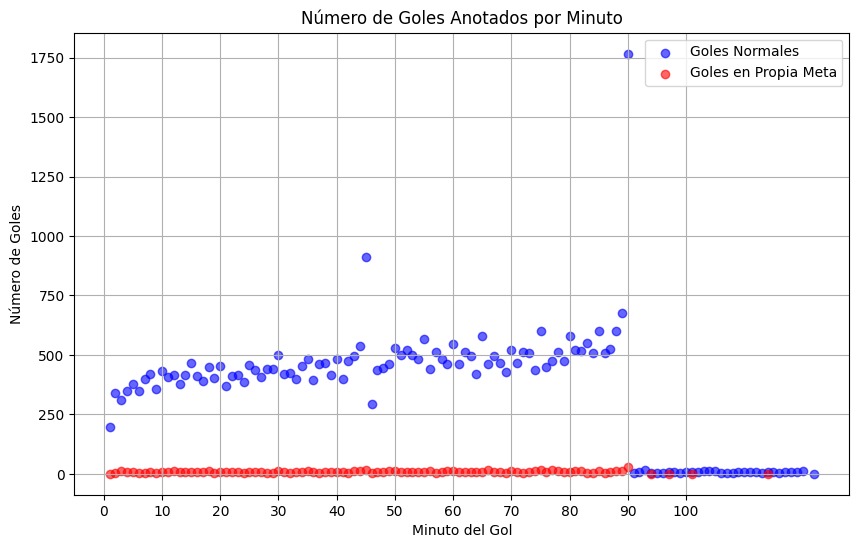

El minuto con más goles ha sido el minuto 90.0


In [11]:
# Bibliografia - https://www.w3schools.com/python/matplotlib_scatter.asp
# Como no se indica que tipo de gol, creamos los goles y los goles en propia meta
goles = dffootball[dffootball['own_goal'] == False]
goles_en_propia = dffootball[dffootball['own_goal'] == True]

# Creamos dos variables para contar los goles "normales" en cada minuto y su sumatorio
goles_por_minuto = goles['minute'].value_counts().reset_index()
goles_por_minuto.columns = ['minute', 'count']

# Creamos dos variables para contar los goles en propia meta en cada minuto y su sumatorio
goles_en_propia_por_minuto = goles_en_propia['minute'].value_counts().reset_index()
goles_en_propia_por_minuto.columns = ['minute', 'count']

# Usamos un plot scatter para poder ver la distribución de los goles por minuto. Cambio de colores para que azul goles normales, rojo goles en propia meta
plt.figure(figsize=(10, 6))
plt.scatter(goles_por_minuto['minute'], goles_por_minuto['count'], color='blue', alpha=0.6, label='Goles Normales')
plt.scatter(goles_en_propia_por_minuto['minute'], goles_en_propia_por_minuto['count'], color='red', alpha=0.6, label='Goles en Propia Meta')
plt.title('Número de Goles Anotados por Minuto')
plt.xlabel('Minuto del Gol')
plt.ylabel('Número de Goles')
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.legend()
plt.show()

# Creamos dos variables nuevas para identificar que minuto tiene más goles
minuto_con_mas_goles = goles_por_minuto.loc[goles_por_minuto['count'].idxmax()]
minuto = minuto_con_mas_goles['minute']
print(f'El minuto con más goles ha sido el minuto {minuto}')

# Apartado 4

En este ejercicio tendrás que importar otro archivo, en este caso el archivo con el nombre 'Melbourne_housing_FULL.csv'. Una vez cargado, se te pedirá realizar algunas visualizaciones.

In [15]:
# Importamos el nuevo fichero de Melbourne
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL (1).csv


### 1. Crea un diagrama de cajas (boxplot) que muestre cómo se distribuye el precio en función del número de habitaciones. Examina si el número de habitaciones influye en el precio del inmueble.

In [16]:
# Importamos el fichero y creamos la variable del dataframe
dfhouse = pd.read_csv("Melbourne_housing_FULL.csv")
dfhouse

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


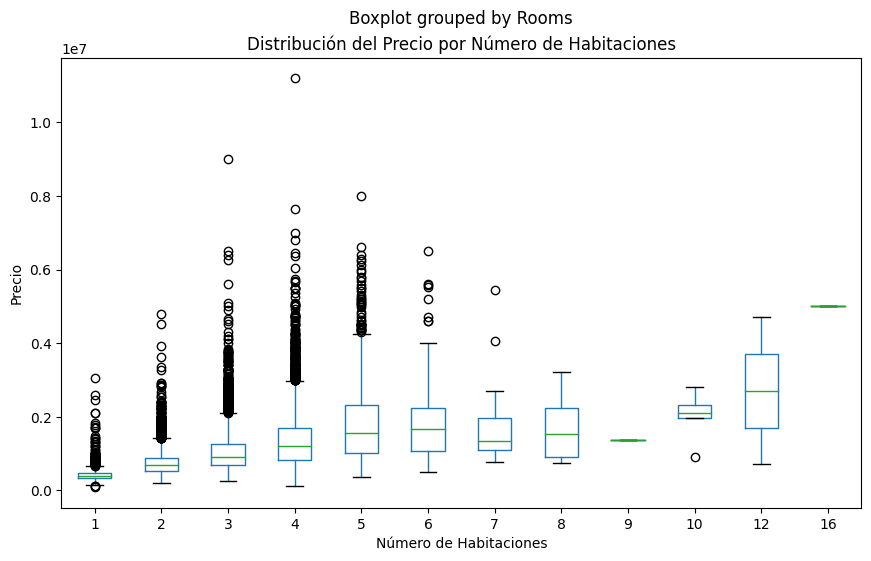

In [17]:
# Bibliografia - https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
# Creamos un boxplot para visualizar la distribución de precios según el número de habitaciones.
# La opción 'by' indica que queremos agrupar los precios en función del número de habitaciones (Rooms en el dataframe).
dfhouse.boxplot(column='Price', by='Rooms', grid=False, figsize=(10, 6))

plt.title('Distribución del Precio por Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')

plt.show()

El boxplot muestra que el precio de las propiedades suele subir con más habitaciones, especialmente hasta 5, donde la caja se ensancha y hay más variedad en los precios. A partir de 6 habitaciones, la caja se hace más estrecha, lo que indica que los precios son más parecidos entre sí, tal vez porque hay menos propiedades o todas tienen características similares. Además, sorprendentemente, las casas de 6 habitaciones son más baratas que las de 5, lo que podría deberse a que hay demasiadas en el mercado, a que la gente no las busca tanto, o a que tienen problemas que hacen que su precio baje.
Esto indica que hay cosas en el mercado inmobiliario que sería bueno investigar más para entender mejor lo que realmente buscan los compradores.

2. Realiza un análisis de la relación entre el número de baños y el número de habitaciones mediante un diagrama de dispersión (scatter plot). Analiza si existe una correlación entre estos dos atributos.

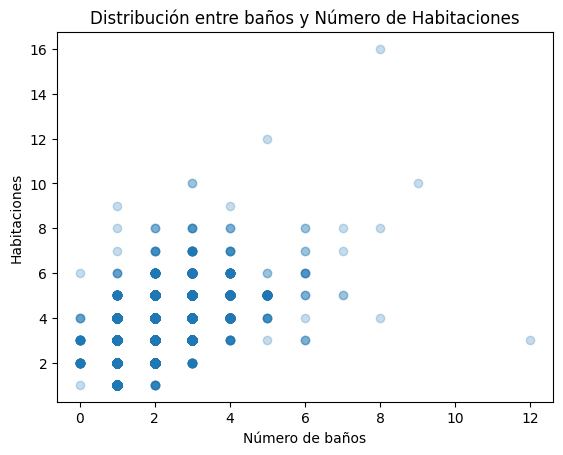

El coeficiente de correlación entre baños y habitaciones es: 0.6118258594416519


In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Creamos un gráfico de dispersión (scatter plot) para visualizar la relación entre el número de baños y el número de habitaciones.
# El eje X representará el número de baños y el eje Y representará el número de habitaciones.
plt.scatter(dfhouse['Bathroom'], dfhouse['Rooms'], alpha=0.25)
plt.title('Distribución entre baños y Número de Habitaciones')
plt.xlabel('Número de baños')
plt.ylabel('Habitaciones')

plt.show()

# Calcular el coeficiente de correlación de entre 'Bathroom' y 'Rooms'
correlacion = dfhouse['Bathroom'].corr(dfhouse['Rooms'])
print(f'El coeficiente de correlación entre baños y habitaciones es: {correlacion}')

El coeficiente de 0.61 y el scatter plot muestran que hay una tendencia a que las casas con más habitaciones también tengan más baños, pero no es una regla estricta. La mayoría de las casas tienen entre 2 y 4 baños, aunque también hay algunas con muchos baños y menos habitaciones. En general, los puntos están algo dispersos, lo que indica que el número de baños no siempre depende de las habitaciones y hay otros factores en juego.

### 3. Agrupa los datos según el tipo de propiedad y calcula el precio promedio para cada tipo. Crea un diagrama de cajas (boxplot) para visualizar la distribución del precio según el tipo de propiedad.

In [ ]:
# Creamos una variable agrupando por tipo e imprimimos los precios medios según el tipo.
precio_promedio = dfhouse.groupby('Type')['Price'].mean().reset_index()
precio_promedio.columns = ['Tipo', 'Precio Promedio']
pd.set_option('display.float_format', '${:,.2f}'.format)
print(precio_promedio)

  Tipo  Precio Promedio
0    h    $1,203,718.50
1    t      $931,077.22
2    u      $627,943.42


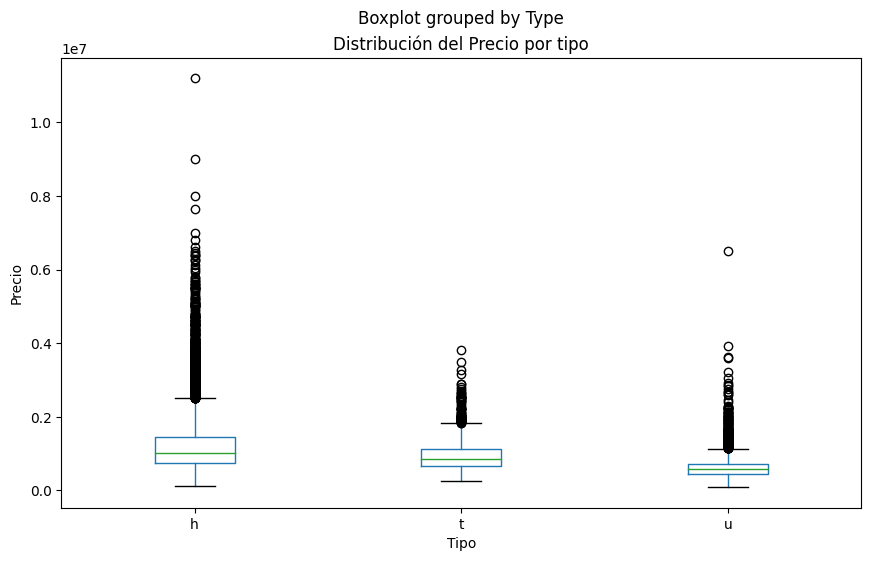

In [ ]:
# Se crea el boxplot como hemos anteriormente pero ahora entre precio y tipo de casa
dfhouse.boxplot(column='Price', by='Type', grid=False, figsize=(10, 6))

plt.title('Distribución del Precio por tipo')
plt.xlabel('Tipo')
plt.ylabel('Precio')

plt.show()

### 4. Crea un gráfico de barras con los 10 barrios que tienen el precio promedio más alto.

In [28]:
# Creamos las variables agrupando con el nombre de sus columna y finalmente con 2 decimales.

precio_promedio_barrio = dfhouse.groupby('Suburb')['Price'].mean().reset_index()
precio_promedio_barrio.columns = ['Barrio', 'Precio Promedio']
pd.set_option('display.float_format', '${:,.2f}'.format)
top10 = precio_promedio_barrio.sort_values(by='Precio Promedio', ascending=False).head(10)
print(top10)

           Barrio  Precio Promedio
64     Canterbury    $2,386,270.59
220   Middle Park    $2,232,148.15
207       Malvern    $2,087,618.64
104      Deepdene    $2,001,785.71
44       Brighton    $1,984,226.93
4     Albert Park    $1,927,650.54
22         Balwyn    $1,893,712.05
62     Camberwell    $1,861,132.86
188           Kew    $1,796,676.04
23   Balwyn North    $1,786,108.75


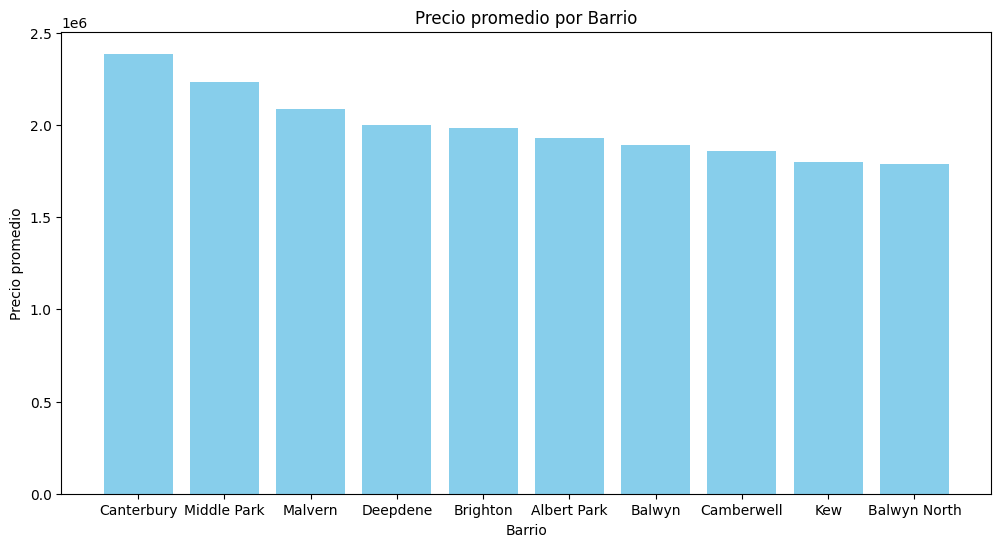

In [37]:
# Creamos el gráfico de barras con la variable creada anteriormente de top10
plt.figure(figsize=(12, 6))
plt.bar(top10['Barrio'], top10['Precio Promedio'], color='skyblue')

plt.title('Precio promedio por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio promedio')

plt.show()

# Apartado 5

En esta sección exploraremos archivos en formato XML y JSON, y cómo realizar su exploración.

### 1. Descargar el archivo XML desde una URL proporcionada. Analizar el contenido del archivo XML para extraer información sobre libros. Imprimir el contenido descargado.

In [49]:
# Bibliografia - https://stackoverflow.com/questions/18308529/python-requests-package-handling-xml-response
import requests
import xml.etree.ElementTree as ET

# URL del fitxer XML
url = 'https://www.w3schools.com/xml/books.xml'

# TODO: download file
response = requests.get(url)

# Save the content of the XML file to a variable
xml_content = response.content

# Parse the XML file
root = ET.fromstring(xml_content)


# TODO: Print the main elements of the XML file
print("Contenido del archivo XML descargado:")
print(ET.tostring(root, encoding='utf8').decode('utf8'))

Contenido del archivo XML descargado:
<?xml version='1.0' encoding='utf8'?>
<bookstore>

<book category="cooking">
  <title lang="en">Everyday Italian</title>
  <author>Giada De Laurentiis</author>
  <year>2005</year>
  <price>30.00</price>
</book>

<book category="children">
  <title lang="en">Harry Potter</title>
  <author>J K. Rowling</author>
  <year>2005</year>
  <price>29.99</price>
</book>

<book category="web">
  <title lang="en">XQuery Kick Start</title>
  <author>James McGovern</author>
  <author>Per Bothner</author>
  <author>Kurt Cagle</author>
  <author>James Linn</author>
  <author>Vaidyanathan Nagarajan</author>
  <year>2003</year>
  <price>49.99</price>
</book>

<book category="web" cover="paperback">
  <title lang="en">Learning XML</title>
  <author>Erik T. Ray</author>
  <year>2003</year>
  <price>39.95</price>
</book>

</bookstore>


### 2. Explorar el archivo XML: Itera a través de todos los libros descargados y muestra la información que contienen.

In [70]:
# Tenemos que crear un diccionario, pero como no sabemos que elementos hay en el xml.
# Aún siendo un xml muy pequeño hacemos una iteración de los elementos con set (conjuntos).

elementos_unicos = set()
valores_unicos = set()

for elem in root:
    elementos_unicos.add(elem.tag)
    for child in elem:
        elementos_unicos.add(child.tag)
        valores_unicos.add(child.text)

print("\nElementos únicos encontrados:")
for elemento in elementos_unicos:
    print(elemento)




Elementos únicos encontrados:
year
author
book
title
price


In [93]:
books = []

# Iterar sobre todos los libros y extraer información
for book in root.findall('book'):
    title = book.find('title').text
    author = book.find('author').text
    year = book.find('year').text
    price = book.find('price').text

    # Almacenar la información del libro en un diccionario
    book_info = {
        'title': title,
        'author': author,
        'year': year,
        'price': price
    }

    # Agregar el diccionario a la lista de libros
    books.append(book_info)

# Imprimir la información de los libros con un f-string
for book in books:
    print(f"Título: {book['title']}, Autor: {book['author']}, Año: {book['year']}, Precio: {book['price']}")


Título: Everyday Italian, Autor: Giada De Laurentiis, Año: 2005, Precio: 30.00
Título: Harry Potter, Autor: J K. Rowling, Año: 2005, Precio: 29.99
Título: XQuery Kick Start, Autor: James McGovern, Año: 2003, Precio: 49.99
Título: Learning XML, Autor: Erik T. Ray, Año: 2003, Precio: 39.95


### 3. Convertir el archivo XML a JSON: Convierte la información extraída del archivo XML al formato JSON y guárdalo en un archivo con formato JSON.

In [94]:
# Bibliografia - https://www.digitalocean.com/community/tutorials/python-xml-to-json-dict

import json
import xmltodict

data_dict = xmltodict.parse(xml_content)
json_data = json.dumps(data_dict, indent=4)

print(json_data)

{
    "bookstore": {
        "book": [
            {
                "@category": "cooking",
                "title": {
                    "@lang": "en",
                    "#text": "Everyday Italian"
                },
                "author": "Giada De Laurentiis",
                "year": "2005",
                "price": "30.00"
            },
            {
                "@category": "children",
                "title": {
                    "@lang": "en",
                    "#text": "Harry Potter"
                },
                "author": "J K. Rowling",
                "year": "2005",
                "price": "29.99"
            },
            {
                "@category": "web",
                "title": {
                    "@lang": "en",
                    "#text": "XQuery Kick Start"
                },
                "author": [
                    "James McGovern",
                    "Per Bothner",
                    "Kurt Cagle",
                    "James Linn"

### 4. Explorar el archivo JSON: Carga la información desde el archivo JSON utilizando pandas y muestra solo aquellos libros de la autora J.K Rowling.

In [119]:
import pandas as pd
import json

dfbooks = pd.json_normalize(data_dict['bookstore']['book'])
rowling_books = dfbooks[dfbooks['author'] == 'J K. Rowling']

print("\nLibros de J.K. Rowling:")
print(rowling_books)



Libros de J.K. Rowling:
  @category        author  year  price title.@lang   title.#text @cover
1  children  J K. Rowling  2005  29.99          en  Harry Potter    NaN
